# *Aya Shibbi -- Senior Project - 2024*

# **Voice-To-Text Emotion Detection**
*Balanced + NonLemmatized Text*

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# balanced - nonlemmatized text
my_csv_nonLem = "/content/drive/MyDrive/AyaShibbi_SeniorProject_2024_LIU/Part2_Emotion_Detection/Datasets/Balanced/Preprocessed_Text/balanced_filtered_text_ds.csv"

Mounted at /content/drive


In [ ]:
# install toolkit
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from wordcloud import WordCloud
from collections import Counter

In [ ]:
# load the nonlemmatized dataset from the CSV file into a pandas DataFrame
csv_nonLem = pd.read_csv(my_csv_nonLem)
df_nonLem = pd.DataFrame(csv_nonLem)

## **2. Emotion Detection**

### Exploratory Data Analysis (EDA)

In [ ]:
# view all data in the dataframe
print(df_nonLem)

                                                   text  label description  \
0                               i didnt feel humiliated      0         sad   
1     i can go from feeling so hopeless to so damned...      0         sad   
2      im grabbing a minute to post i feel greedy wrong      3       anger   
3     i am ever feeling nostalgic about the fireplac...      2        love   
4                                  i am feeling grouchy      3       anger   
...                                                 ...    ...         ...   
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                                           cleaned_text  \
0   

In [ ]:
# information about the data
print(df_nonLem.info)

<bound method DataFrame.info of                                                    text  label description  \
0                               i didnt feel humiliated      0         sad   
1     i can go from feeling so hopeless to so damned...      0         sad   
2      im grabbing a minute to post i feel greedy wrong      3       anger   
3     i am ever feeling nostalgic about the fireplac...      2        love   
4                                  i am feeling grouchy      3       anger   
...                                                 ...    ...         ...   
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                               

In [ ]:
# view columns
print(df_nonLem.columns)

Index(['text', 'label', 'description', 'cleaned_text', 'filtered_text'], dtype='object')


In [ ]:
# number of records and features
print(df_nonLem.shape)

(9226, 5)


In [ ]:
# number of null values
print(df_nonLem.isnull().sum())

text             0
label            0
description      0
cleaned_text     0
filtered_text    0
dtype: int64


In [ ]:
# view first 5 rows
print(df_nonLem.head())

                                                text  label description  \
0                            i didnt feel humiliated      0         sad   
1  i can go from feeling so hopeless to so damned...      0         sad   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                        cleaned_text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                       filtered_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy 

In [ ]:
# view last 5 rows
print(df_nonLem.tail())

                                                   text  label description  \
9221  i like the feel of the game but im not very fo...      2        love   
9222  im feeling a little tender and mashed today an...      2        love   
9223  i can feel all supportive and jrock ish in sch...      2        love   
9224  i feel like i got to know her a bit and what i...      2        love   
9225  i feel i should make is how surprised but ente...      5    surprise   

                                           cleaned_text  \
9221  i like the feel of the game but im not very fo...   
9222  im feeling a little tender and mashed today an...   
9223  i can feel all supportive and jrock ish in sch...   
9224  i feel like i got to know her a bit and what i...   
9225  i feel i should make is how surprised but ente...   

                                          filtered_text  
9221                like feel game im fond color scheme  
9222      im feeling little tender mashed today im best  
92

In [ ]:
# average word count
average_word_count = df_nonLem['filtered_text'].str.split().str.len().mean()
print(f"Average Word Count per Text: {average_word_count:.2f}")

Average Word Count per Text: 9.43


In [ ]:
# emotion distribution
number_emotion_distribution = df_nonLem['description'].value_counts()
percentage_emotion_distribution = df_nonLem['description'].value_counts(normalize = True)

print(number_emotion_distribution) # numbers
print("-" * 30)
print(percentage_emotion_distribution) # percentages

description
joy         1888
fear        1741
sad         1672
love        1641
anger       1565
surprise     719
Name: count, dtype: int64
------------------------------
description
joy         0.204639
fear        0.188706
sad         0.181227
love        0.177867
anger       0.169629
surprise    0.077932
Name: proportion, dtype: float64


#### Emotion Distribution Visualization

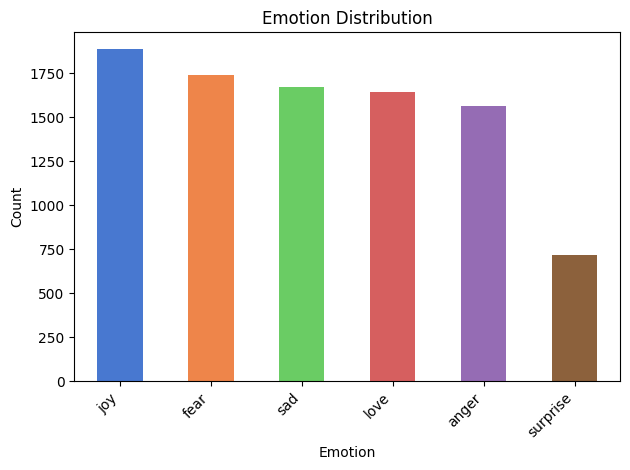

In [ ]:
# create the bar chart
number_emotion_distribution.plot(kind='bar', color=sns.color_palette("muted"))
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()

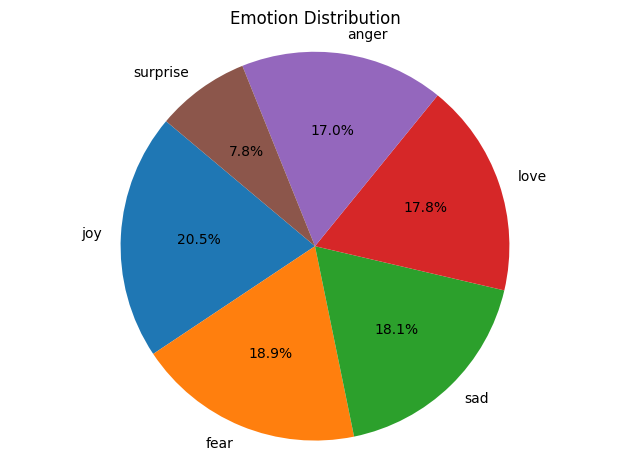

In [ ]:
# create the pie chart
plt.pie(percentage_emotion_distribution, labels=percentage_emotion_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Emotion Distribution")
plt.axis('equal')  # equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

#### Overall Text Length Distribution

In [ ]:
# text length for each text (count characters)
text_lengths = df_nonLem['filtered_text'].str.len()

print(text_lengths[:5])

0    21
1    61
2    41
3    52
4    15
Name: filtered_text, dtype: int64


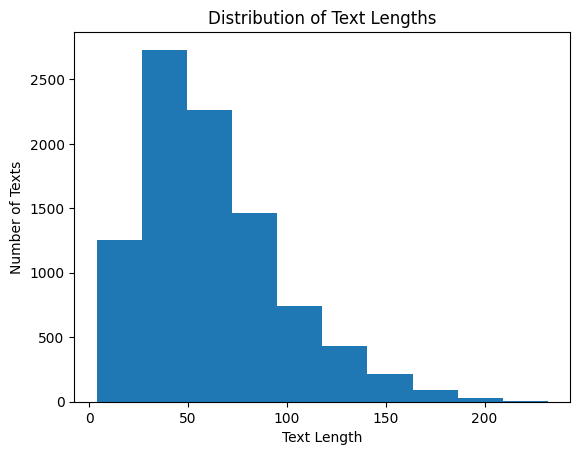

In [ ]:
# Create the histogram
plt.hist(text_lengths)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:
# print the mean text length (count characters)
mean_text_length = text_lengths.mean()
print(f"Mean Text Length: {mean_text_length:.2f}")

Mean Text Length: 62.30


<ipython-input-19-2af9cc181816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


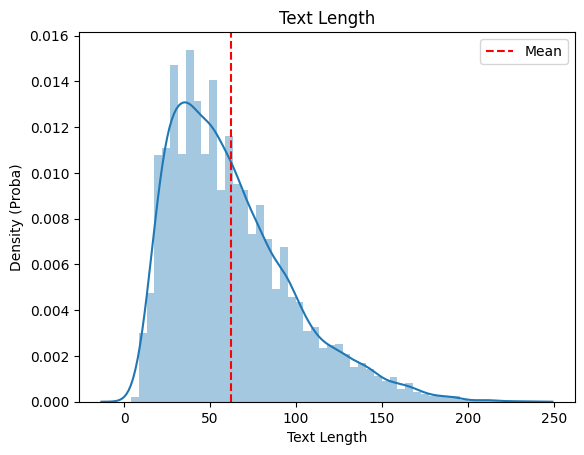

In [ ]:
# Create the distplot of Text Length
sns.distplot(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Density (Proba)')
plt.title('Text Length')
plt.axvline(mean_text_length, color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.show()

#### Word Frequency Per Text

In [ ]:
# find the text length and word count of each record
text_word_count = df_nonLem['filtered_text'].apply(lambda x: len(str(x).split())) # words

print(text_word_count[:5])

0    3
1    9
2    7
3    7
4    2
Name: filtered_text, dtype: int64


In [ ]:
# print the mean text word count
mean_text_word_count = text_word_count.mean()
print(f"Mean Text Word Count: {mean_text_word_count:.2f}")

Mean Text Word Count: 9.43


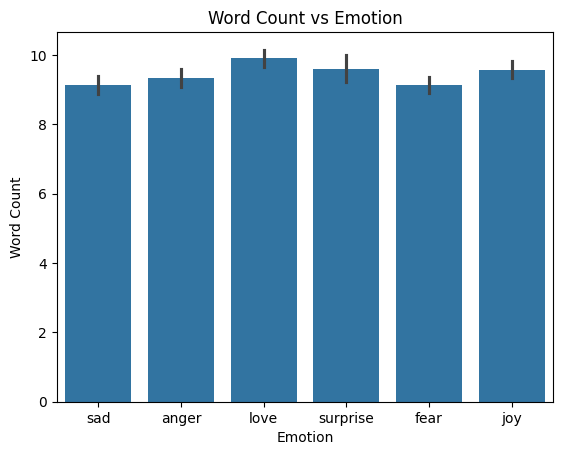

In [ ]:
# Create the barplot of Text Word Count
sns.barplot(x = df_nonLem['description'], y = text_word_count)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.title('Word Count vs Emotion')
plt.show()

#### **Tokenization**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenization
tokenized_text = []

for sentence in df_nonLem['filtered_text']:
  tokens = nltk.word_tokenize(sentence)
  tokenized_text.append(tokens)

print(tokenized_text[:5])

[['didnt', 'feel', 'humiliated'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]


#### Word Frequency vs. Emotion

In [ ]:
from collections import Counter
def get_word_frequencies(text_list):
  word_counts = Counter()
  for text in text_list:
    word_counts.update(text)
  return word_counts

# Get word frequencies for all text
word_freqs = get_word_frequencies(tokenized_text)

print(word_freqs)

Counter({'feel': 6414, 'feeling': 2963, 'like': 1662, 'im': 1383, 'really': 543, 'know': 504, 'little': 498, 'time': 452, 'get': 426, 'people': 406, 'want': 392, 'still': 366, 'would': 362, 'one': 347, 'bit': 338, 'even': 334, 'think': 328, 'ive': 319, 'life': 311, 'love': 307, 'way': 301, 'something': 297, 'much': 280, 'dont': 277, 'make': 274, 'things': 271, 'going': 270, 'could': 268, 'day': 233, 'need': 233, 'back': 231, 'go': 224, 'always': 215, 'feels': 210, 'feelings': 206, 'around': 203, 'good': 199, 'also': 198, 'work': 188, 'see': 187, 'right': 186, 'say': 184, 'pretty': 182, 'though': 171, 'cant': 169, 'today': 165, 'help': 163, 'someone': 161, 'felt': 160, 'didnt': 157, 'got': 157, 'made': 155, 'many': 155, 'never': 154, 'find': 143, 'makes': 142, 'strange': 140, 'lot': 138, 'well': 138, 'every': 138, 'enough': 138, 'remember': 137, 'days': 134, 'overwhelmed': 132, 'quite': 131, 'weird': 131, 'ever': 129, 'sure': 128, 'sometimes': 128, 'less': 127, 'away': 125, 'person': 12

In [ ]:
# Group words by emotion
emotion_word_freqs = {}
for emotion in df_nonLem['description'].unique():
  df_emotion = df_nonLem[df_nonLem['description'] == emotion]
  emotion_word_freqs[emotion] = get_word_frequencies(tokenized_text)

# Prepare data for visualization (adjust based on your needs)
top_n_words = 10  # Number of top words to visualize
emotions = list(emotion_word_freqs.keys())

word_data = []
for emotion, word_freq in emotion_word_freqs.items():
  top_words = word_freq.most_common(top_n_words)  # Get top words for this emotion
  word_data.append([word for word, _ in top_words])  # Extract just words

In [ ]:
from wordcloud import WordCloud

# Create word clouds for each emotion
for emotion, word_freq in emotion_word_freqs.items():
  word_cloud = WordCloud(width=800, height=600).generate_from_frequencies(word_freq)
  plt.figure(figsize=(8, 6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {emotion} Text')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### N-Gram Analysis

In [ ]:
# creating individual dataframes of different emotions
sadness = df_nonLem[df_nonLem['label']==0]['filtered_text']
joy = df_nonLem[df_nonLem['label']==1]['filtered_text']
love = df_nonLem[df_nonLem['label']==2]['filtered_text']
anger = df_nonLem[df_nonLem['label']==3]['filtered_text']
fear = df_nonLem[df_nonLem['label']==4]['filtered_text']
surprise = df_nonLem[df_nonLem['label']==5]['filtered_text']

In [ ]:
# code to calculate ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

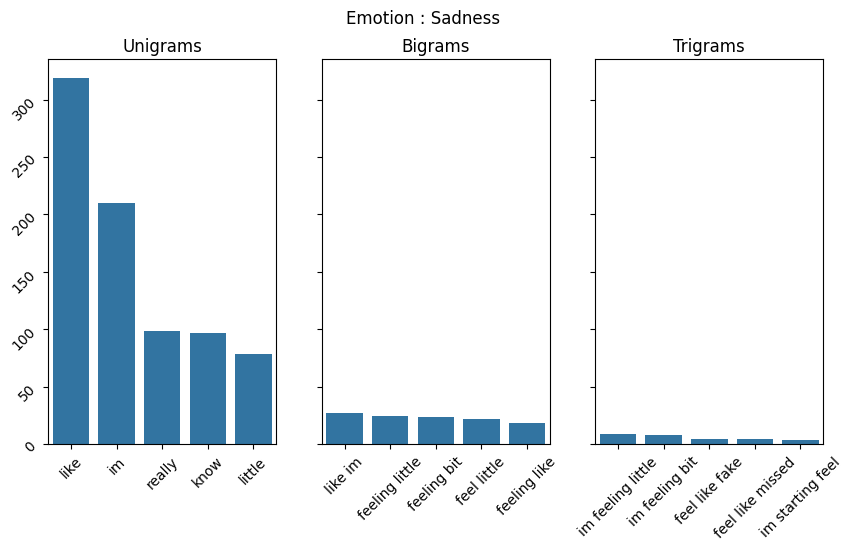

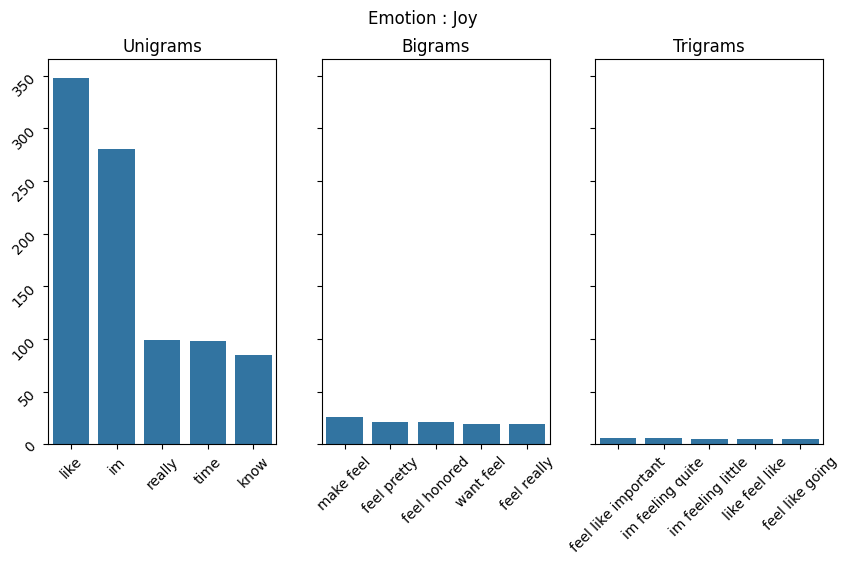

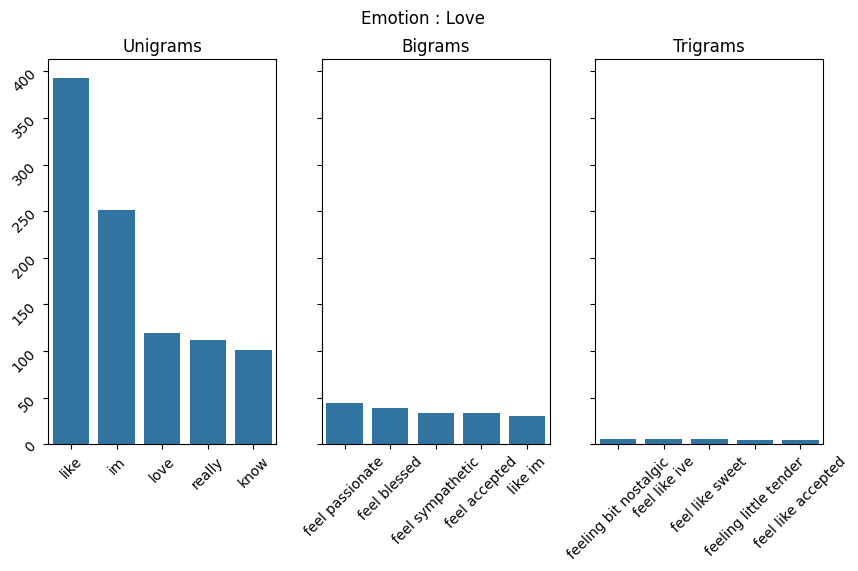

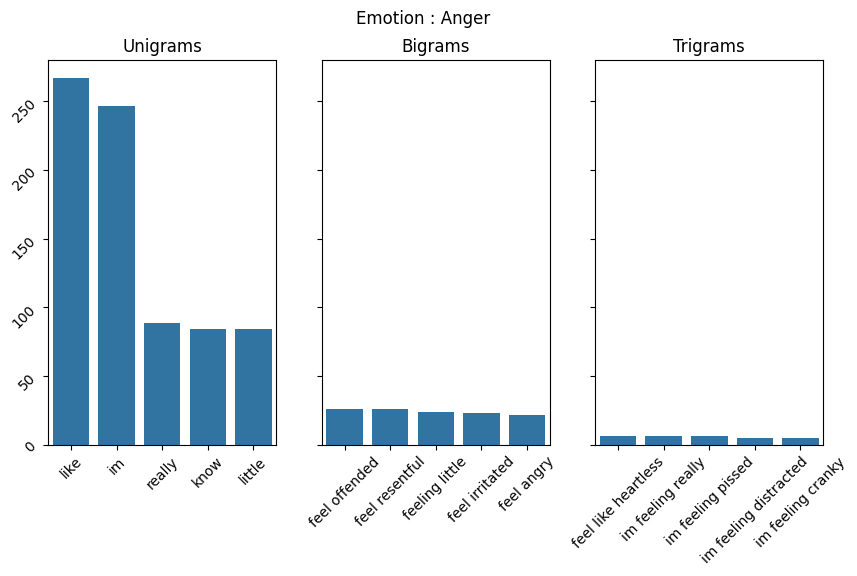

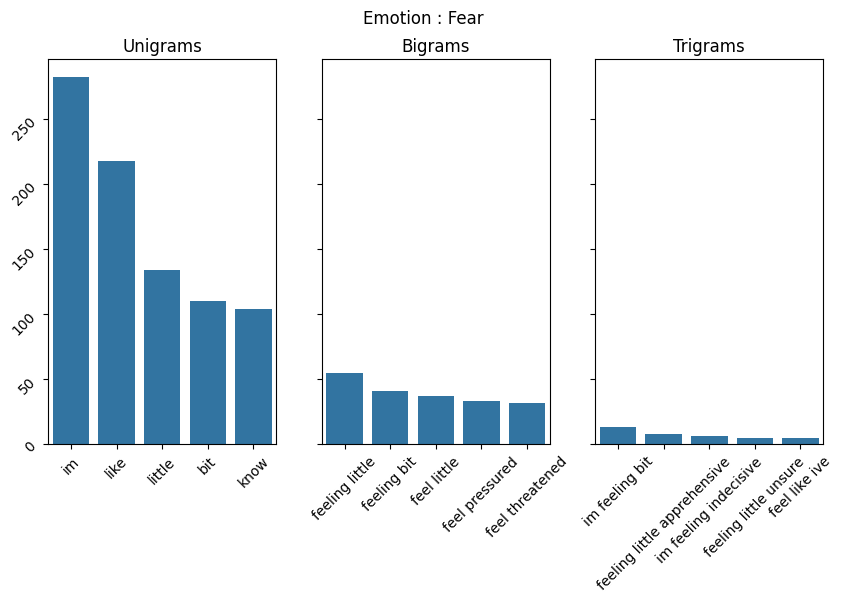

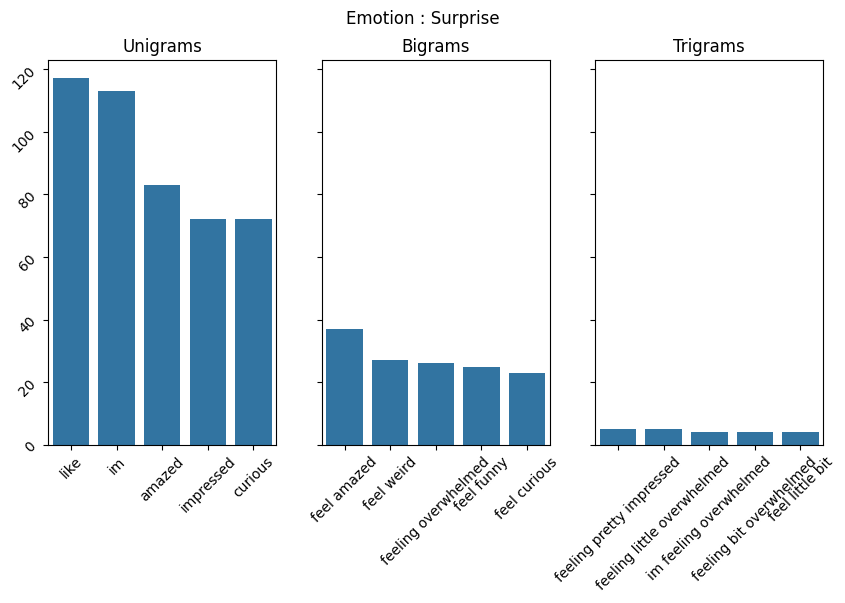

In [ ]:
# visualizing the ngrams for the emotions
#Sadness
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Fear
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('fear.png')


#Surprise
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('suprise.png')

### **Vectorization (convert text to numerical values)**

In [ ]:
non_lemmatized_text_data = df_nonLem['filtered_text']

#### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# unigram --> 1
countVectorizer_n1 = CountVectorizer()

In [ ]:
# unigram & bigram --> 1 & 2
countVectorizer_n2 = CountVectorizer(ngram_range= (1,2))

In [ ]:
# bigram --> 2
countVectorizer_n3 = CountVectorizer(ngram_range= (2,2))

##### Unigram

In [ ]:
countVectorizer_n1.fit(non_lemmatized_text_data)
X_CV_n1_nonlem = countVectorizer_n1.transform(non_lemmatized_text_data)

print(X_CV_n1_nonlem.shape)

(9226, 11382)


##### Unigram and Bigram

In [ ]:
countVectorizer_n2.fit(non_lemmatized_text_data)
X_CV_n2_nonlem = countVectorizer_n2.transform(non_lemmatized_text_data)

print(X_CV_n2_nonlem.shape)

(9226, 70275)


##### Bigram

In [ ]:
countVectorizer_n3.fit(non_lemmatized_text_data)
X_CV_n3_nonlem = countVectorizer_n3.transform(non_lemmatized_text_data)

print(X_CV_n3_nonlem.shape)

(9226, 58893)


#### TfidfVectorizer (Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# unigram --> 1
tfidfVectorizer_n1 = TfidfVectorizer()

In [ ]:
# unigram & bigram --> 1 & 2
tfidfVectorizer_n2 = TfidfVectorizer(ngram_range= (1,2))

In [ ]:
# bigram --> 2
tfidfVectorizer_n3 = TfidfVectorizer(ngram_range= (2,2))

##### Unigram

In [ ]:
tfidfVectorizer_n1.fit(non_lemmatized_text_data)
X_TfIdf_n1_nonlem = tfidfVectorizer_n1.transform(non_lemmatized_text_data)

print(X_TfIdf_n1_nonlem.shape)

(9226, 11382)


##### Unigram and Bigram

In [ ]:
tfidfVectorizer_n2.fit(non_lemmatized_text_data)
X_TfIdf_n2_nonlem = tfidfVectorizer_n2.transform(non_lemmatized_text_data)

print(X_TfIdf_n2_nonlem.shape)

(9226, 70275)


##### Bigram

In [ ]:
tfidfVectorizer_n3.fit(non_lemmatized_text_data)
X_TfIdf_n3_nonlem = tfidfVectorizer_n3.transform(non_lemmatized_text_data)

print(X_TfIdf_n3_nonlem.shape)

(9226, 58893)


### **Training Model -- Traditional ML Algorithms**

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
# split X and y into training and testing sets
def split_X_y(X):
  X = X
  y = df_nonLem['label']

  # split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

  return X_train, X_test, y_train, y_test

In [ ]:
def confusion_matrix(cnf_matrix):
  class_names=[0, 1, 2, 3, 4, 5] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#### *Naive Bayes*

In [ ]:
# import NB model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
def NB_model(X_train, y_train, X_test):
  # feature selection
  selector = SelectKBest(chi2, k=1000)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)

  # create a naive bayes classifier
  nb = MultinomialNB(alpha=0.1)

  # train the model using the training sets
  nb.fit(X_train_selected, y_train)

  y_pred = nb.predict(X_test_selected)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[284  10   4  16  16   2]
 [ 13 325  32   6  12   7]
 [  7  15 299   6   2   1]
 [  8   6   3 270   9   2]
 [  8  10   3   9 301   9]
 [  2   6   1   4  39  99]]


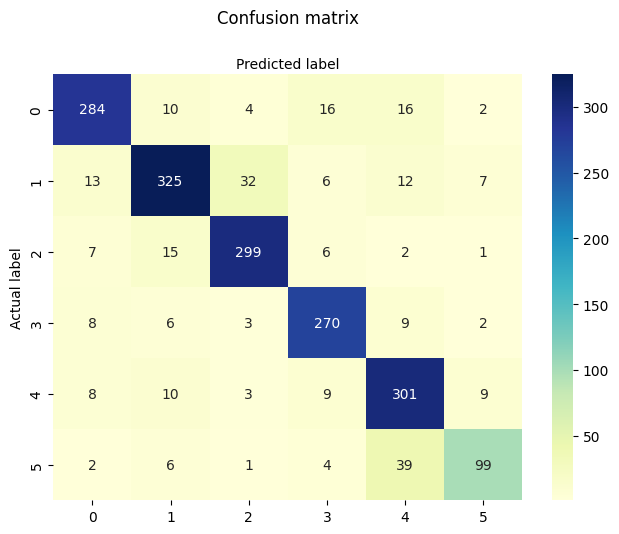

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.86      0.87       332
     Sadness       0.87      0.82      0.85       395
       Anger       0.87      0.91      0.89       330
        Fear       0.87      0.91      0.89       298
        Love       0.79      0.89      0.84       340
   Surprised       0.82      0.66      0.73       151

    accuracy                           0.85      1846
   macro avg       0.85      0.84      0.84      1846
weighted avg       0.86      0.85      0.85      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[296   8   2  13  12   1]
 [  9 332  30   4  14   6]
 [  3  17 306   2   2   0]
 [  2   8   1 279   7   1]
 [  8   5   3   7 291  26]
 [  1   0   0   1  15 134]]


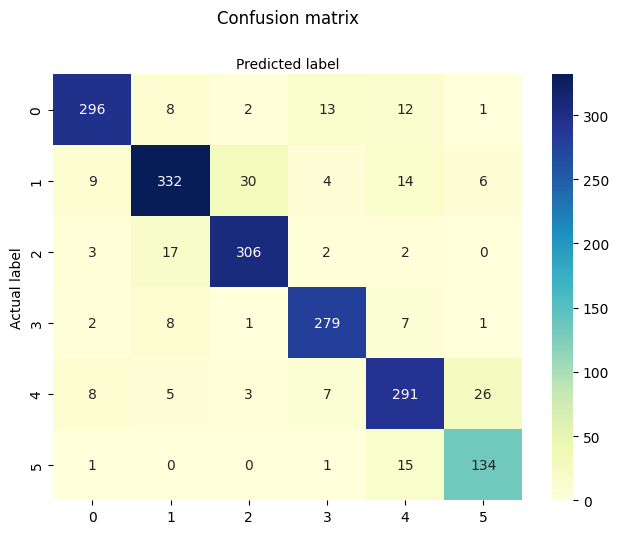

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.89      0.91       332
     Sadness       0.90      0.84      0.87       395
       Anger       0.89      0.93      0.91       330
        Fear       0.91      0.94      0.92       298
        Love       0.85      0.86      0.85       340
   Surprised       0.80      0.89      0.84       151

    accuracy                           0.89      1846
   macro avg       0.88      0.89      0.88      1846
weighted avg       0.89      0.89      0.89      1846



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[129 163   7  10  23   0]
 [  4 357  12   7  12   3]
 [  3 161 150   6  10   0]
 [  0 115  10 160  11   2]
 [  4 104   7   6 216   3]
 [  2  47   3   2  33  64]]


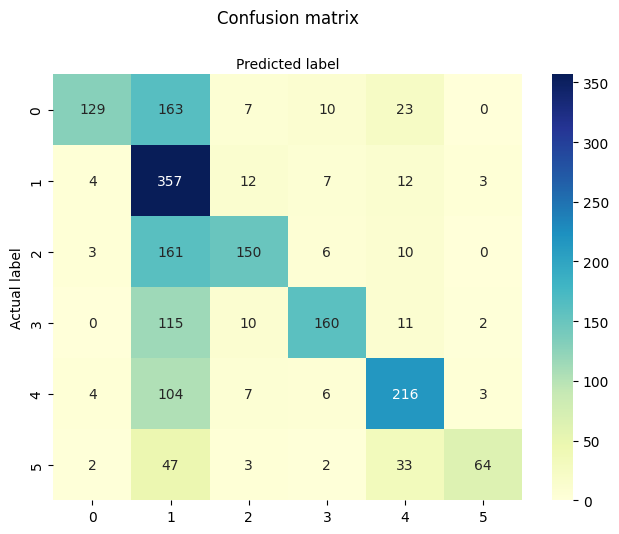

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.39      0.54       332
     Sadness       0.38      0.90      0.53       395
       Anger       0.79      0.45      0.58       330
        Fear       0.84      0.54      0.65       298
        Love       0.71      0.64      0.67       340
   Surprised       0.89      0.42      0.57       151

    accuracy                           0.58      1846
   macro avg       0.75      0.56      0.59      1846
weighted avg       0.72      0.58      0.59      1846



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[287   9   3  15  18   0]
 [ 12 335  34   6   8   0]
 [  6  21 293   7   2   1]
 [  5   8   4 266  15   0]
 [  7  14   2   8 307   2]
 [  5  23   2   6  42  73]]


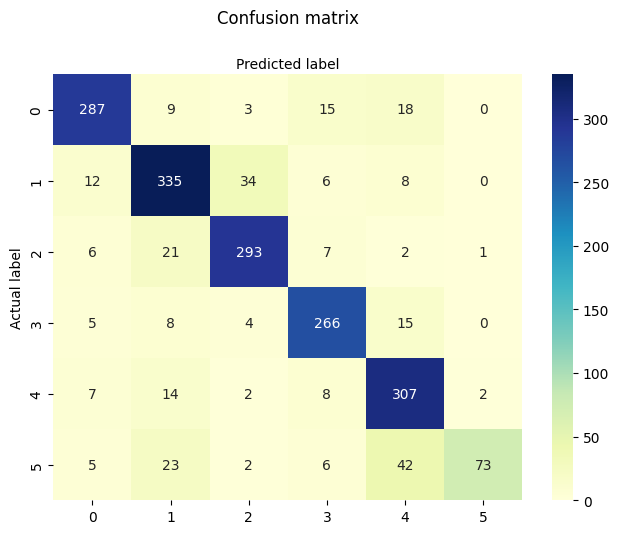

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.86      0.88       332
     Sadness       0.82      0.85      0.83       395
       Anger       0.87      0.89      0.88       330
        Fear       0.86      0.89      0.88       298
        Love       0.78      0.90      0.84       340
   Surprised       0.96      0.48      0.64       151

    accuracy                           0.85      1846
   macro avg       0.86      0.81      0.82      1846
weighted avg       0.85      0.85      0.84      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[296  15   3  10   8   0]
 [  4 356  29   2   4   0]
 [  2  18 308   1   1   0]
 [  2  11   0 276   9   0]
 [  5  10   2   3 320   0]
 [  3  31   3   2  51  61]]


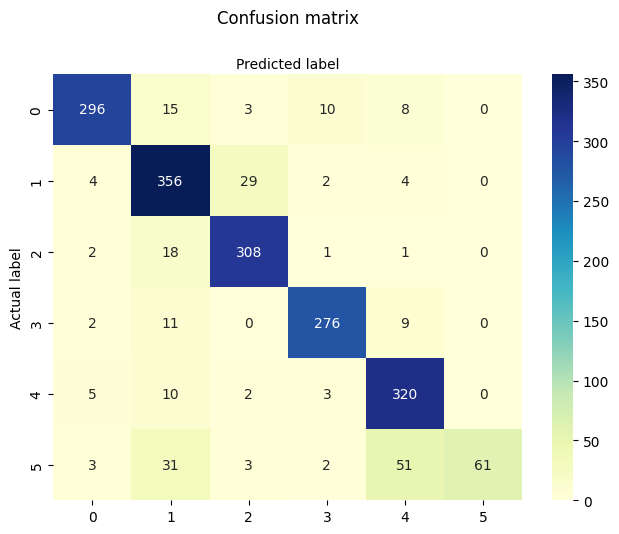

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.89      0.92       332
     Sadness       0.81      0.90      0.85       395
       Anger       0.89      0.93      0.91       330
        Fear       0.94      0.93      0.93       298
        Love       0.81      0.94      0.87       340
   Surprised       1.00      0.40      0.58       151

    accuracy                           0.88      1846
   macro avg       0.90      0.83      0.84      1846
weighted avg       0.89      0.88      0.87      1846



##### TfidfVectorizer -- Bigram(n3)





In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[122 176   3   9  22   0]
 [  1 367  11   4  12   0]
 [  0 179 136   6   9   0]
 [  2 133   0 149  14   0]
 [  0 111   1   6 221   1]
 [  1  82   0   1  40  27]]


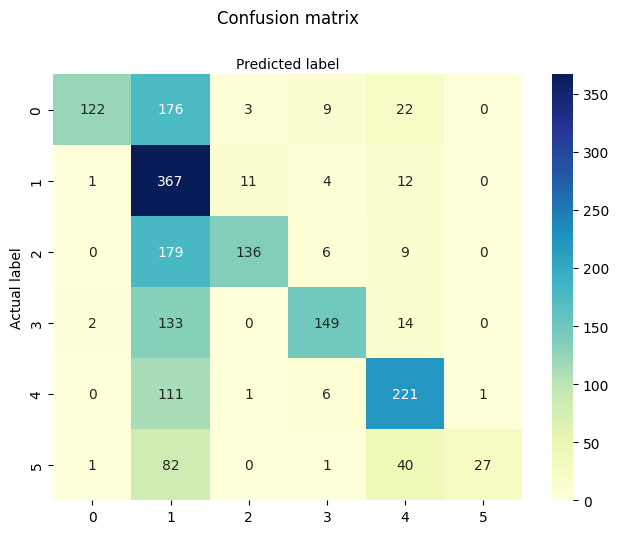

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.97      0.37      0.53       332
     Sadness       0.35      0.93      0.51       395
       Anger       0.90      0.41      0.57       330
        Fear       0.85      0.50      0.63       298
        Love       0.69      0.65      0.67       340
   Surprised       0.96      0.18      0.30       151

    accuracy                           0.55      1846
   macro avg       0.79      0.51      0.54      1846
weighted avg       0.75      0.55      0.56      1846



#### *K-Nearest Neighbor (KNN)*

In [ ]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def find_optimal_k(X_train, y_train, X_test, y_test):
  # Find the optimal value of k
  max_k = min(15, X_train.shape[0]) # Limit the maximum value of k to avoid overfitting
  best_accuracy = 0
  best_k = 0
  accuracy_values = []
  k_values = []
  for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k = k

  return best_k

In [ ]:
def KNN_model(X_train, y_train, X_test, best_k):
  # Train the KNN classifier using the optimal value of k
  scaler = StandardScaler(with_mean=False)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  return y_pred

##### CounterVectorizer - Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[157  53  24  46  45   7]
 [ 60 197  45  52  27  14]
 [ 26  49 182  39  26   8]
 [ 29  49  13 175  25   7]
 [ 31  49  17  40 176  27]
 [ 15  15   2   7  23  89]]


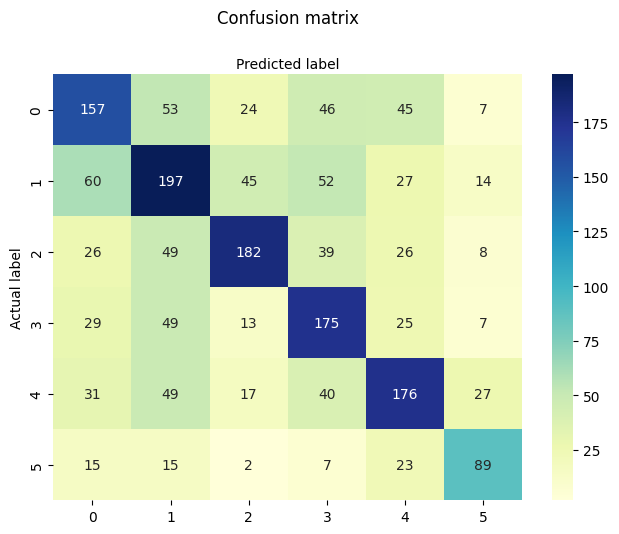

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.49      0.47      0.48       332
     Sadness       0.48      0.50      0.49       395
       Anger       0.64      0.55      0.59       330
        Fear       0.49      0.59      0.53       298
        Love       0.55      0.52      0.53       340
   Surprised       0.59      0.59      0.59       151

    accuracy                           0.53      1846
   macro avg       0.54      0.54      0.54      1846
weighted avg       0.53      0.53      0.53      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[123 115   6  52  31   5]
 [ 30 257  25  50  24   9]
 [ 20  77 140  71  16   6]
 [ 18  78   4 166  24   8]
 [ 15  81   6  49 163  26]
 [  7  30   4  16  20  74]]


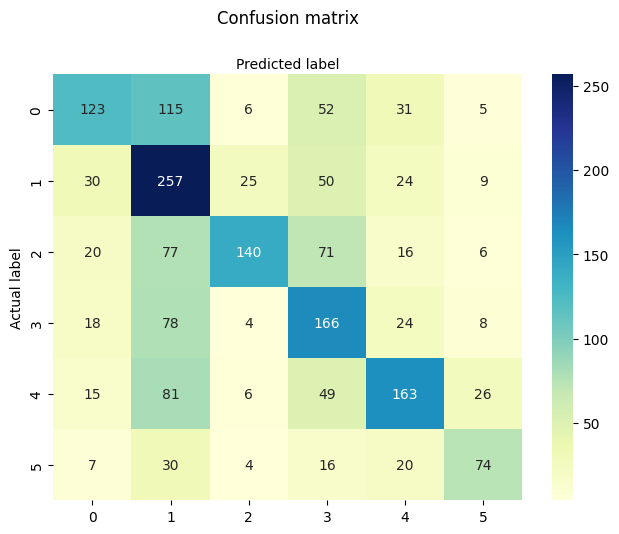

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.58      0.37      0.45       332
     Sadness       0.40      0.65      0.50       395
       Anger       0.76      0.42      0.54       330
        Fear       0.41      0.56      0.47       298
        Love       0.59      0.48      0.53       340
   Surprised       0.58      0.49      0.53       151

    accuracy                           0.50      1846
   macro avg       0.55      0.50      0.50      1846
weighted avg       0.55      0.50      0.50      1846



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 99   9   5  23 196   0]
 [ 55  70  11   9 250   0]
 [ 53  13  78  10 175   1]
 [ 22  10   4 122 140   0]
 [ 25  19   8  19 254  15]
 [ 14  10   2  28  65  32]]


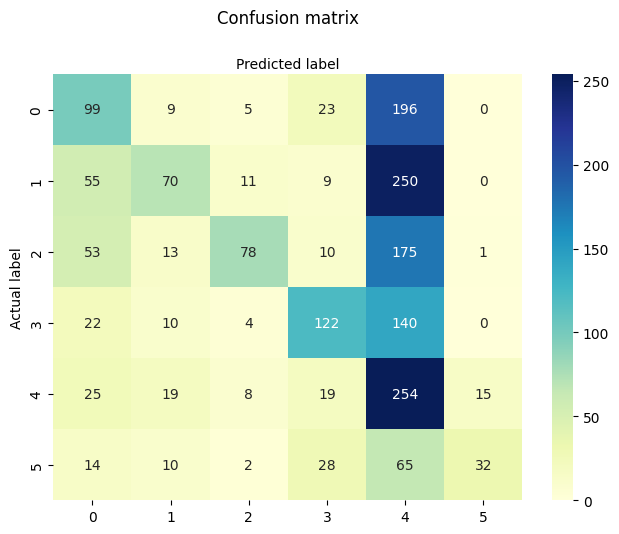

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.37      0.30      0.33       332
     Sadness       0.53      0.18      0.27       395
       Anger       0.72      0.24      0.36       330
        Fear       0.58      0.41      0.48       298
        Love       0.24      0.75      0.36       340
   Surprised       0.67      0.21      0.32       151

    accuracy                           0.35      1846
   macro avg       0.52      0.35      0.35      1846
weighted avg       0.50      0.35      0.35      1846



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[267  16  13  16  20   0]
 [ 23 300  34  11  20   7]
 [ 14  25 272  11   6   2]
 [ 30   8  14 232  12   2]
 [ 15  17  15  15 260  18]
 [ 12  10   4   9  23  93]]


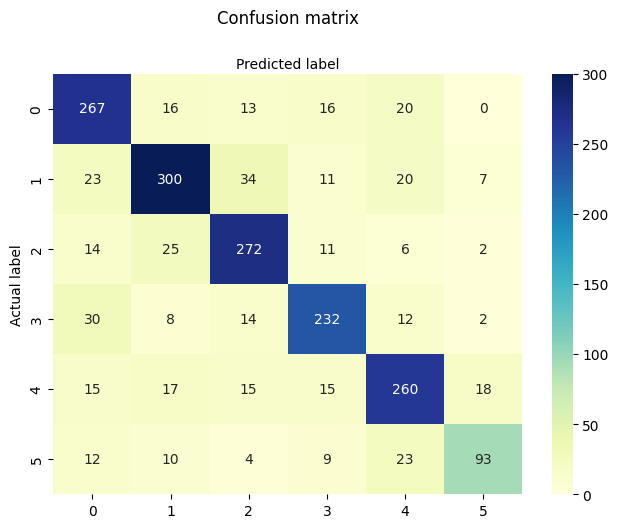

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.74      0.80      0.77       332
     Sadness       0.80      0.76      0.78       395
       Anger       0.77      0.82      0.80       330
        Fear       0.79      0.78      0.78       298
        Love       0.76      0.76      0.76       340
   Surprised       0.76      0.62      0.68       151

    accuracy                           0.77      1846
   macro avg       0.77      0.76      0.76      1846
weighted avg       0.77      0.77      0.77      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[268  16   8  19  21   0]
 [ 34 283  38  14  19   7]
 [ 18  31 257   8  16   0]
 [ 24   9   9 234  20   2]
 [ 14  13   3  17 280  13]
 [ 16   9   4   8  25  89]]


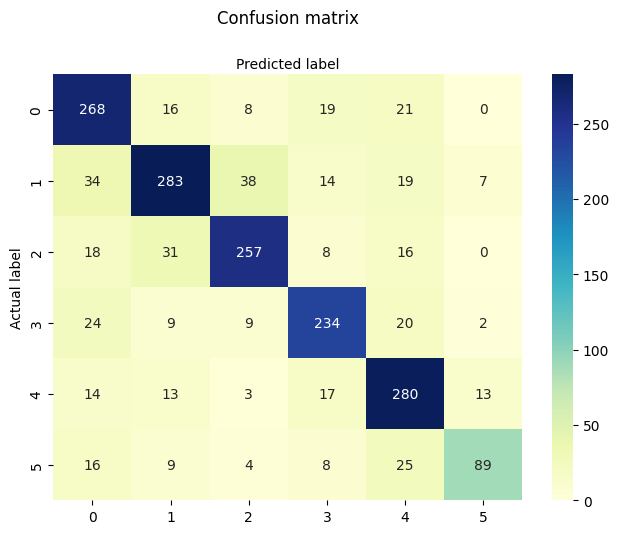

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.72      0.81      0.76       332
     Sadness       0.78      0.72      0.75       395
       Anger       0.81      0.78      0.79       330
        Fear       0.78      0.79      0.78       298
        Love       0.73      0.82      0.78       340
   Surprised       0.80      0.59      0.68       151

    accuracy                           0.76      1846
   macro avg       0.77      0.75      0.76      1846
weighted avg       0.77      0.76      0.76      1846



##### TfidfVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[144  61  13  58  56   0]
 [ 10 272  19  48  44   2]
 [  7  99 141  49  34   0]
 [ 10  61   8 192  27   0]
 [ 10  50   4  32 240   4]
 [  5  31   2  21  45  47]]


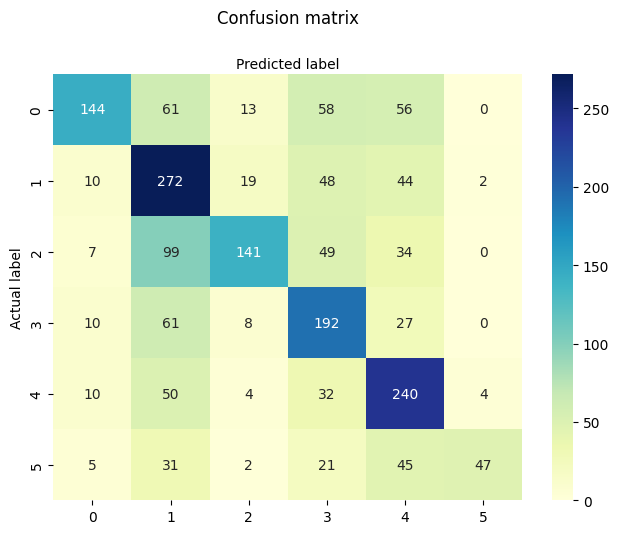

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.77      0.43      0.56       332
     Sadness       0.47      0.69      0.56       395
       Anger       0.75      0.43      0.55       330
        Fear       0.48      0.64      0.55       298
        Love       0.54      0.71      0.61       340
   Surprised       0.89      0.31      0.46       151

    accuracy                           0.56      1846
   macro avg       0.65      0.54      0.55      1846
weighted avg       0.62      0.56      0.56      1846



#### *Logistic Regression*

In [ ]:
# import LR model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
def LR_model(X_train, y_train, X_test, max_iter=1000):
  # Model Selection & Hyperparameter Tuning
  param_grid = {'C': [0.1, 0.5, 1, 2, 5]}
  logreg = LogisticRegression(random_state=16, max_iter=max_iter)
  grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  y_pred = grid_search.best_estimator_.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[289  12   5  14  10   2]
 [ 14 334  28   5   8   6]
 [  1  19 305   4   1   0]
 [  8   5   2 273   9   1]
 [ 10   6   3  10 289  22]
 [  4   5   1   1  24 116]]


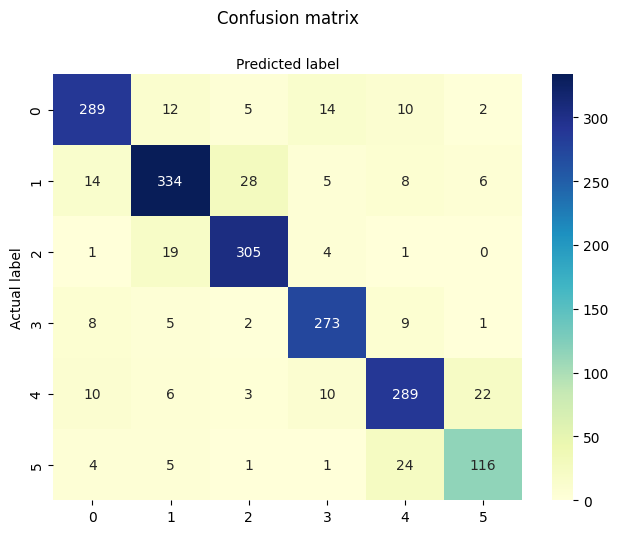

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.87      0.88       332
     Sadness       0.88      0.85      0.86       395
       Anger       0.89      0.92      0.91       330
        Fear       0.89      0.92      0.90       298
        Love       0.85      0.85      0.85       340
   Surprised       0.79      0.77      0.78       151

    accuracy                           0.87      1846
   macro avg       0.86      0.86      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[290  15   5  12  10   0]
 [  7 340  30   4   7   7]
 [  1  12 316   1   0   0]
 [ 10   4   1 275   7   1]
 [  6   8   1   6 298  21]
 [  3   3   0   1  26 118]]


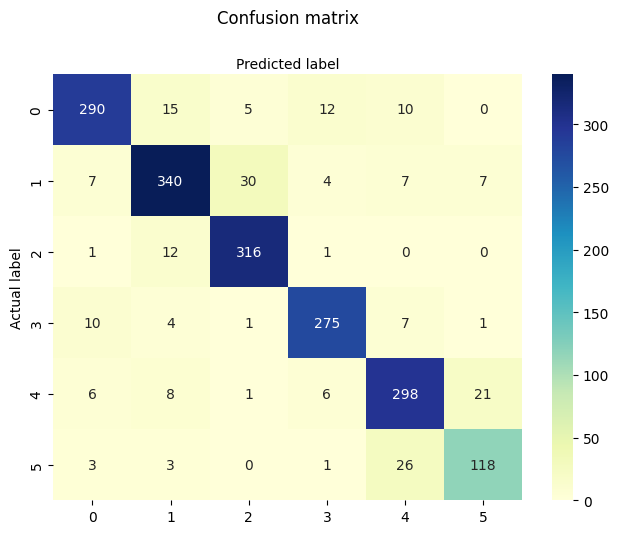

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.87      0.89       332
     Sadness       0.89      0.86      0.88       395
       Anger       0.90      0.96      0.93       330
        Fear       0.92      0.92      0.92       298
        Love       0.86      0.88      0.87       340
   Surprised       0.80      0.78      0.79       151

    accuracy                           0.89      1846
   macro avg       0.88      0.88      0.88      1846
weighted avg       0.89      0.89      0.89      1846



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[211  61  13  27  20   0]
 [ 42 278  32  22  19   2]
 [ 18  87 187  21  16   1]
 [ 25  57   8 188  20   0]
 [ 18  50   7  23 230  12]
 [  6  22   9  12  30  72]]


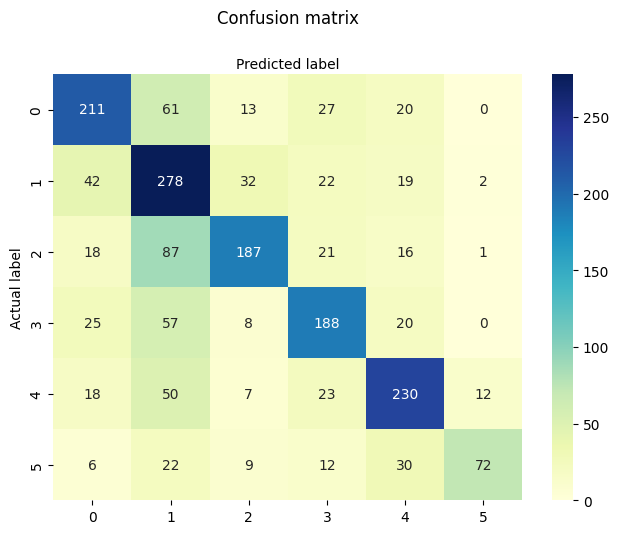

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.66      0.64      0.65       332
     Sadness       0.50      0.70      0.59       395
       Anger       0.73      0.57      0.64       330
        Fear       0.64      0.63      0.64       298
        Love       0.69      0.68      0.68       340
   Surprised       0.83      0.48      0.61       151

    accuracy                           0.63      1846
   macro avg       0.67      0.62      0.63      1846
weighted avg       0.65      0.63      0.63      1846



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  18   5  15  10   1]
 [ 10 342  26   5   7   5]
 [  1  18 305   5   1   0]
 [  9   8   2 270   7   2]
 [ 10  14   2   8 295  11]
 [  2   7   1   2  30 109]]


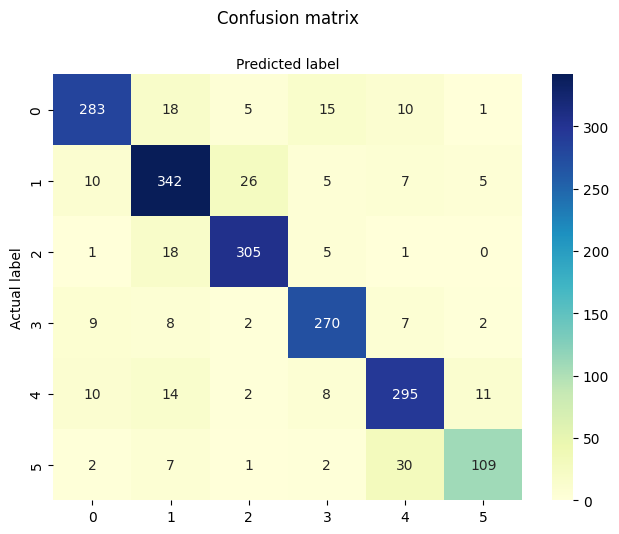

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.85      0.87       332
     Sadness       0.84      0.87      0.85       395
       Anger       0.89      0.92      0.91       330
        Fear       0.89      0.91      0.90       298
        Love       0.84      0.87      0.86       340
   Surprised       0.85      0.72      0.78       151

    accuracy                           0.87      1846
   macro avg       0.87      0.86      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[279  25   5  11  12   0]
 [  6 349  27   5   5   3]
 [  1  16 311   2   0   0]
 [ 11  14   1 264   7   1]
 [  7  15   2   6 302   8]
 [  4  14   1   2  32  98]]


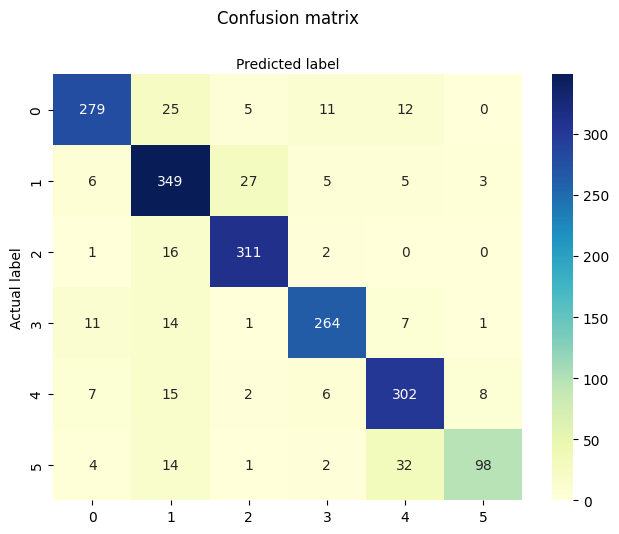

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.84      0.87       332
     Sadness       0.81      0.88      0.84       395
       Anger       0.90      0.94      0.92       330
        Fear       0.91      0.89      0.90       298
        Love       0.84      0.89      0.87       340
   Surprised       0.89      0.65      0.75       151

    accuracy                           0.87      1846
   macro avg       0.88      0.85      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[202  78  14  20  18   0]
 [ 29 304  30  13  18   1]
 [ 15 103 186  14  12   0]
 [ 18  67  12 184  17   0]
 [ 14  63   7  16 235   5]
 [  6  46   9   9  37  44]]


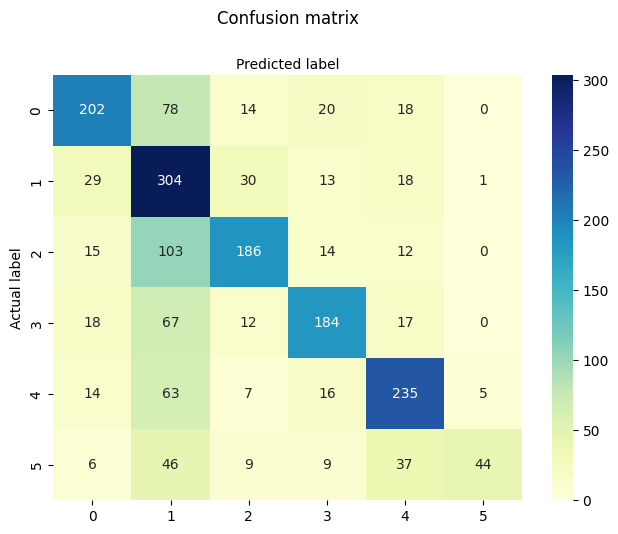

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.71      0.61      0.66       332
     Sadness       0.46      0.77      0.58       395
       Anger       0.72      0.56      0.63       330
        Fear       0.72      0.62      0.66       298
        Love       0.70      0.69      0.69       340
   Surprised       0.88      0.29      0.44       151

    accuracy                           0.63      1846
   macro avg       0.70      0.59      0.61      1846
weighted avg       0.67      0.63      0.63      1846



#### *Support Vector Machines (SVM)*

In [226]:
# import SVM model
from sklearn import svm

In [227]:
def SVM_model(X_train, y_train, X_test):
  # create a svm Classifier
  svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

  # train the model using the training sets
  svm_classifier.fit(X_train, y_train)

  y_pred = svm_classifier.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [228]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [229]:
y_pred = SVM_model(X_train, y_train, X_test)

In [230]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[294  10   4  12  11   1]
 [ 14 328  34   5   8   6]
 [  1  11 315   0   0   3]
 [  9   4   3 272   9   1]
 [  9   8   4  10 287  22]
 [  3   4   0   0  22 122]]


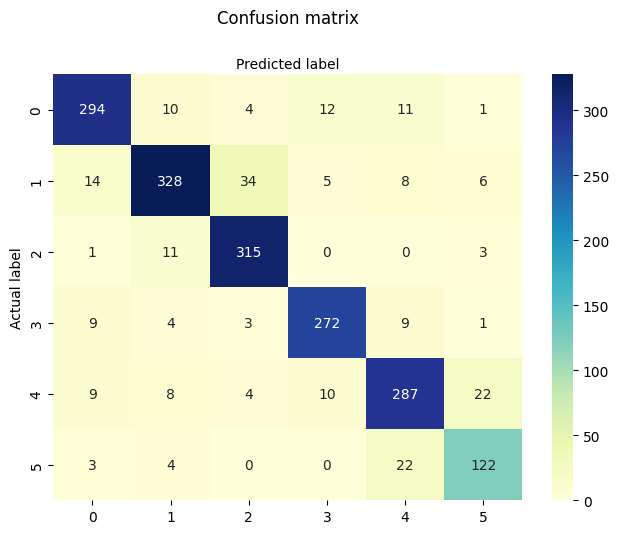

In [231]:
confusion_matrix(cnf_matrix)

In [232]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.89      0.89       332
     Sadness       0.90      0.83      0.86       395
       Anger       0.88      0.95      0.91       330
        Fear       0.91      0.91      0.91       298
        Love       0.85      0.84      0.85       340
   Surprised       0.79      0.81      0.80       151

    accuracy                           0.88      1846
   macro avg       0.87      0.87      0.87      1846
weighted avg       0.88      0.88      0.88      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [233]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [234]:
y_pred = SVM_model(X_train, y_train, X_test)

In [235]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[291  14   6  11   9   1]
 [ 10 334  33   5   8   5]
 [  0  10 318   1   0   1]
 [  8   3   1 280   5   1]
 [  6  10   2   8 293  21]
 [  4   1   0   0  26 120]]


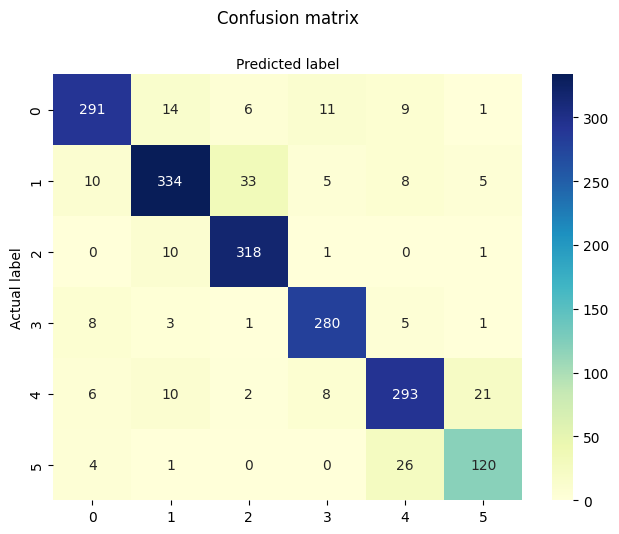

In [236]:
confusion_matrix(cnf_matrix)

In [237]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.88      0.89       332
     Sadness       0.90      0.85      0.87       395
       Anger       0.88      0.96      0.92       330
        Fear       0.92      0.94      0.93       298
        Love       0.86      0.86      0.86       340
   Surprised       0.81      0.79      0.80       151

    accuracy                           0.89      1846
   macro avg       0.88      0.88      0.88      1846
weighted avg       0.89      0.89      0.89      1846



##### CounterVectorizer -- Bigram(n3)

In [238]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [239]:
y_pred = SVM_model(X_train, y_train, X_test)

In [240]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[213  65  11  23  20   0]
 [ 47 289  25  18  14   2]
 [ 23 100 174  18  14   1]
 [ 17  62   9 186  24   0]
 [ 15  53   5  19 235  13]
 [  4  30   6  12  32  67]]


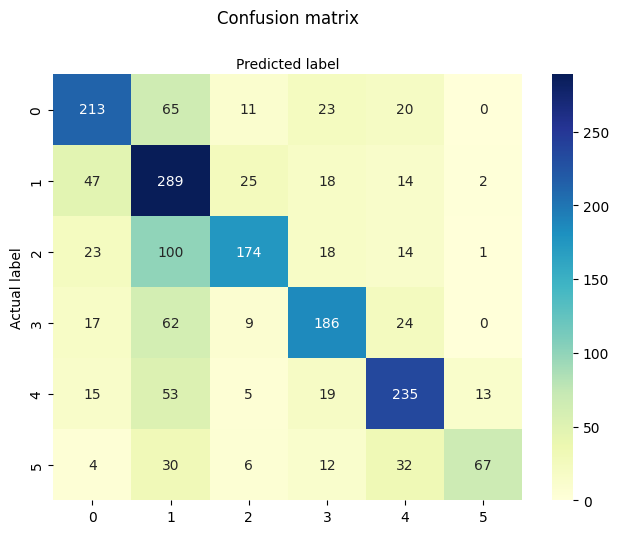

In [241]:
confusion_matrix(cnf_matrix)

In [242]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.67      0.64      0.65       332
     Sadness       0.48      0.73      0.58       395
       Anger       0.76      0.53      0.62       330
        Fear       0.67      0.62      0.65       298
        Love       0.69      0.69      0.69       340
   Surprised       0.81      0.44      0.57       151

    accuracy                           0.63      1846
   macro avg       0.68      0.61      0.63      1846
weighted avg       0.66      0.63      0.63      1846



##### TfidfVectorizer -- Unigram(n1)

In [243]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [244]:
y_pred = SVM_model(X_train, y_train, X_test)

In [245]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[279  23   6  13  10   1]
 [  8 339  34   3   6   5]
 [  1   9 315   3   1   1]
 [ 11  12   3 263   7   2]
 [  7  13   1  10 296  13]
 [  3   5   1   2  26 114]]


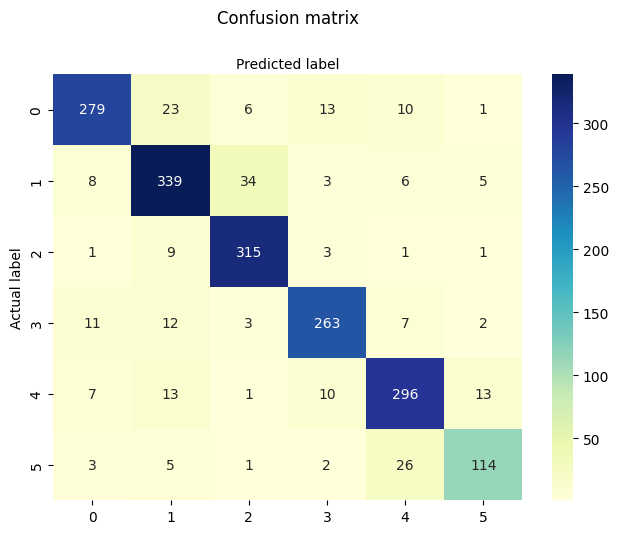

In [246]:
confusion_matrix(cnf_matrix)

In [247]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.84      0.87       332
     Sadness       0.85      0.86      0.85       395
       Anger       0.88      0.95      0.91       330
        Fear       0.89      0.88      0.89       298
        Love       0.86      0.87      0.86       340
   Surprised       0.84      0.75      0.79       151

    accuracy                           0.87      1846
   macro avg       0.87      0.86      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [248]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [249]:
y_pred = SVM_model(X_train, y_train, X_test)

In [250]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  26   5  11   7   0]
 [  6 343  32   3   7   4]
 [  1  11 315   2   1   0]
 [  8  21   2 263   3   1]
 [  6  19   1   7 303   4]
 [  5  15   1   1  35  94]]


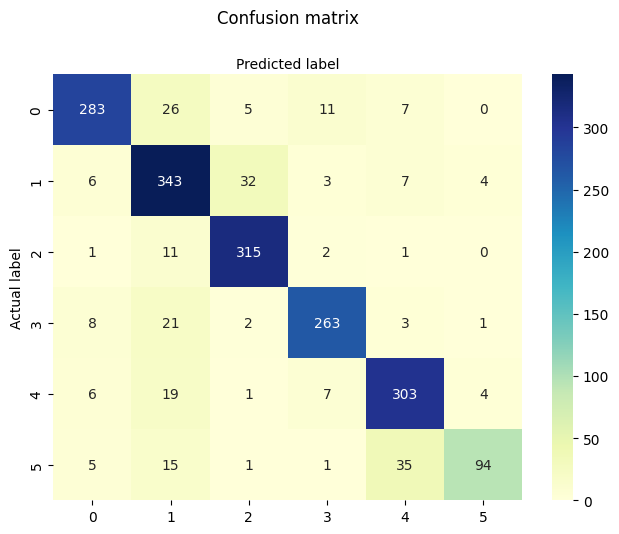

In [251]:
confusion_matrix(cnf_matrix)

In [252]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.85      0.88       332
     Sadness       0.79      0.87      0.83       395
       Anger       0.88      0.95      0.92       330
        Fear       0.92      0.88      0.90       298
        Love       0.85      0.89      0.87       340
   Surprised       0.91      0.62      0.74       151

    accuracy                           0.87      1846
   macro avg       0.88      0.85      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Bigram(n3)

In [253]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [254]:
y_pred = SVM_model(X_train, y_train, X_test)

In [255]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[196  90  12  17  17   0]
 [ 27 318  26  11  13   0]
 [ 14 122 176   9   9   0]
 [ 15  83  10 177  13   0]
 [ 11  74   6  15 231   3]
 [  6  54   8   6  38  39]]


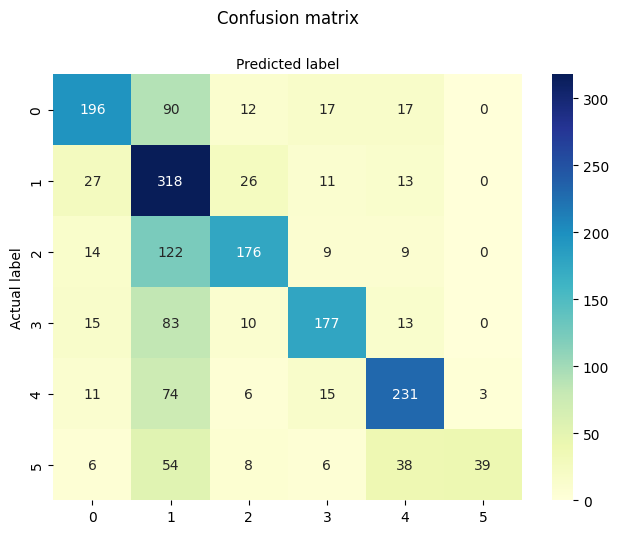

In [256]:
confusion_matrix(cnf_matrix)

In [257]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.73      0.59      0.65       332
     Sadness       0.43      0.81      0.56       395
       Anger       0.74      0.53      0.62       330
        Fear       0.75      0.59      0.66       298
        Love       0.72      0.68      0.70       340
   Surprised       0.93      0.26      0.40       151

    accuracy                           0.62      1846
   macro avg       0.72      0.58      0.60      1846
weighted avg       0.69      0.62      0.62      1846



#### *Decision Tree*

In [258]:
# import DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [259]:
def DT_model(X_train, y_train, X_test):
  # define the parameter grid
  param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

  # create a decision tree classifier
  dt = DecisionTreeClassifier()

  # perform grid search
  grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # get the best parameters
  best_params = grid_search.best_params_

  # train the model using the best parameters
  dt = DecisionTreeClassifier(max_depth=best_params['max_depth'])
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [260]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [261]:
y_pred = DT_model(X_train, y_train, X_test)

In [262]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[290  10   6  13  11   2]
 [ 14 322  37   6  11   5]
 [  0  12 309   4   3   2]
 [ 10   5   3 267  12   1]
 [  2   4   2   9 301  22]
 [  0   2   0   0  27 122]]


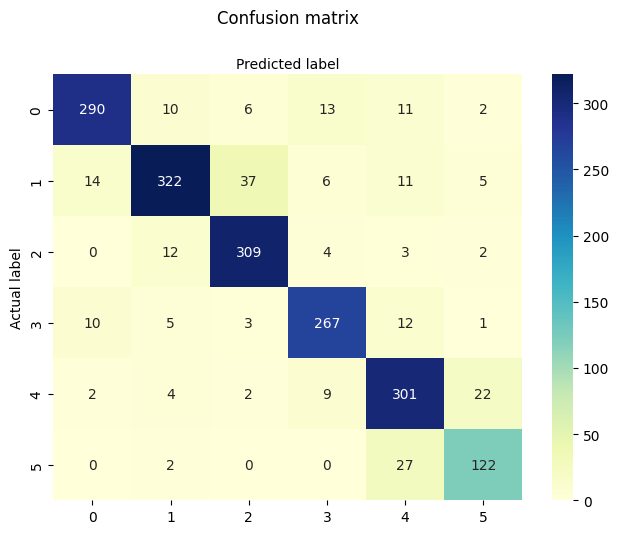

In [263]:
confusion_matrix(cnf_matrix)

In [264]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.87      0.90       332
     Sadness       0.91      0.82      0.86       395
       Anger       0.87      0.94      0.90       330
        Fear       0.89      0.90      0.89       298
        Love       0.82      0.89      0.85       340
   Surprised       0.79      0.81      0.80       151

    accuracy                           0.87      1846
   macro avg       0.87      0.87      0.87      1846
weighted avg       0.87      0.87      0.87      1846



##### CounterVectorizer -- Unigram and Bigram(n2)

In [265]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [266]:
y_pred = DT_model(X_train, y_train, X_test)

In [267]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[295   7   6  11  11   2]
 [ 12 325  37   4  12   5]
 [  0   8 315   4   1   2]
 [  6   5   3 268  15   1]
 [  4   3   2   6 306  19]
 [  0   1   0   0  26 124]]


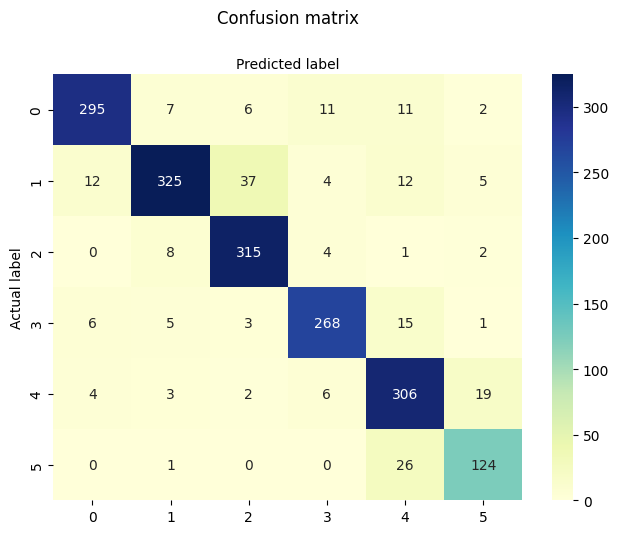

In [268]:
confusion_matrix(cnf_matrix)

In [269]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.89      0.91       332
     Sadness       0.93      0.82      0.87       395
       Anger       0.87      0.95      0.91       330
        Fear       0.91      0.90      0.91       298
        Love       0.82      0.90      0.86       340
   Surprised       0.81      0.82      0.82       151

    accuracy                           0.88      1846
   macro avg       0.88      0.88      0.88      1846
weighted avg       0.89      0.88      0.88      1846



##### CounterVectorizer -- Bigram(n3)

In [270]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [271]:
y_pred = DT_model(X_train, y_train, X_test)

In [272]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[171  59  12  78  11   1]
 [ 25 228  32  95  10   5]
 [ 11  69 161  77   9   3]
 [ 14  31  13 227  11   2]
 [ 12  33   7  58 214  16]
 [  8  18   5  24  23  73]]


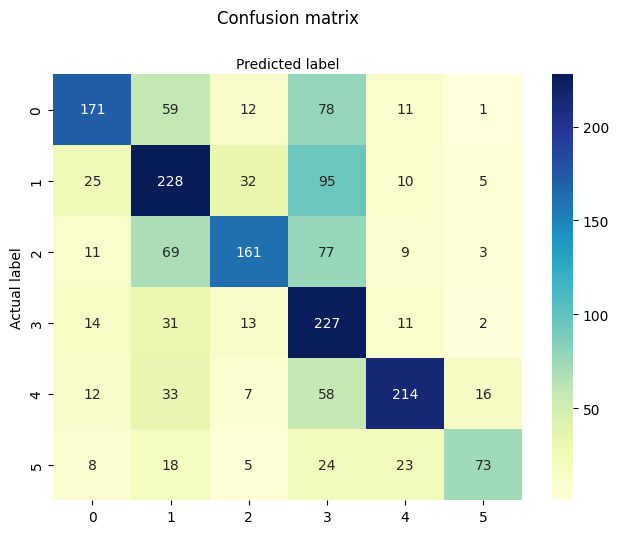

In [273]:
confusion_matrix(cnf_matrix)

In [274]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.71      0.52      0.60       332
     Sadness       0.52      0.58      0.55       395
       Anger       0.70      0.49      0.58       330
        Fear       0.41      0.76      0.53       298
        Love       0.77      0.63      0.69       340
   Surprised       0.73      0.48      0.58       151

    accuracy                           0.58      1846
   macro avg       0.64      0.58      0.59      1846
weighted avg       0.63      0.58      0.59      1846



##### TfidfVectorizer -- Unigram(n1)

In [275]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [276]:
y_pred = DT_model(X_train, y_train, X_test)

In [277]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  19   5  11  12   2]
 [ 18 318  36   7  12   4]
 [  1  13 310   2   2   2]
 [ 11   6   4 260  16   1]
 [  2  11   2   9 299  17]
 [  0   1   0   0  26 124]]


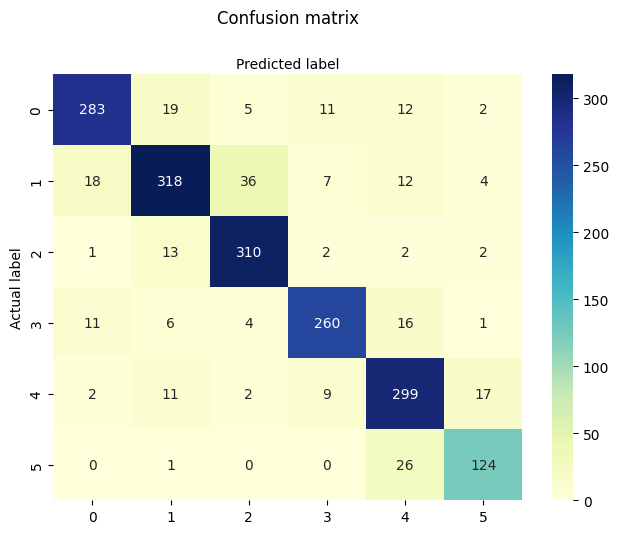

In [278]:
confusion_matrix(cnf_matrix)

In [279]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.85      0.87       332
     Sadness       0.86      0.81      0.83       395
       Anger       0.87      0.94      0.90       330
        Fear       0.90      0.87      0.89       298
        Love       0.81      0.88      0.85       340
   Surprised       0.83      0.82      0.82       151

    accuracy                           0.86      1846
   macro avg       0.86      0.86      0.86      1846
weighted avg       0.86      0.86      0.86      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [280]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [281]:
y_pred = DT_model(X_train, y_train, X_test)

In [282]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[283  18   5  13  11   2]
 [ 13 324  37   6  11   4]
 [  0  12 311   4   1   2]
 [  8  10   3 260  16   1]
 [  2   9   2  10 301  16]
 [  0   3   0   1  25 122]]


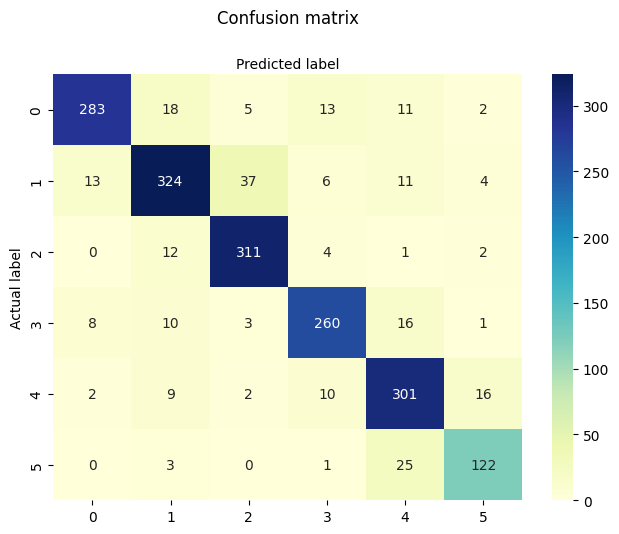

In [283]:
confusion_matrix(cnf_matrix)

In [284]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.85      0.89       332
     Sadness       0.86      0.82      0.84       395
       Anger       0.87      0.94      0.90       330
        Fear       0.88      0.87      0.88       298
        Love       0.82      0.89      0.85       340
   Surprised       0.83      0.81      0.82       151

    accuracy                           0.87      1846
   macro avg       0.87      0.86      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Bigram(n3)

In [285]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [286]:
y_pred = DT_model(X_train, y_train, X_test)

In [287]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[167  29  25  83  26   2]
 [ 28 187  41 119  11   9]
 [ 18  44 168  87  12   1]
 [ 10  29  17 224  18   0]
 [ 15  19   9  74 206  17]
 [  5  16   7  27  20  76]]


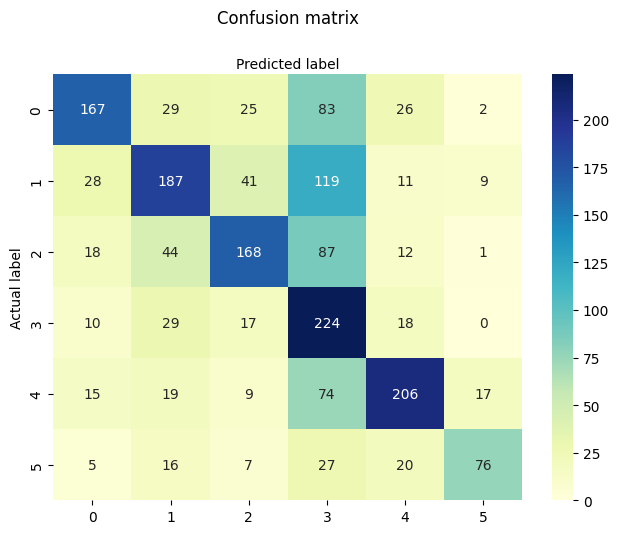

In [288]:
confusion_matrix(cnf_matrix)

In [289]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.69      0.50      0.58       332
     Sadness       0.58      0.47      0.52       395
       Anger       0.63      0.51      0.56       330
        Fear       0.36      0.75      0.49       298
        Love       0.70      0.61      0.65       340
   Surprised       0.72      0.50      0.59       151

    accuracy                           0.56      1846
   macro avg       0.61      0.56      0.57      1846
weighted avg       0.61      0.56      0.56      1846



#### *Random Forest*

In [290]:
# import RF model
from sklearn.ensemble import RandomForestClassifier

In [291]:
def RF_model(X_train, y_train, X_test):
  # instantiate the model
  rf = RandomForestClassifier()

  # fit the model with data
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [292]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [293]:
y_pred = RF_model(X_train, y_train, X_test)

In [294]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[287  14   6  12  11   2]
 [ 14 324  36   4  10   7]
 [  1   5 318   4   1   1]
 [  9  11   4 262  11   1]
 [  6   4   2  10 296  22]
 [  2   0   0   1  18 130]]


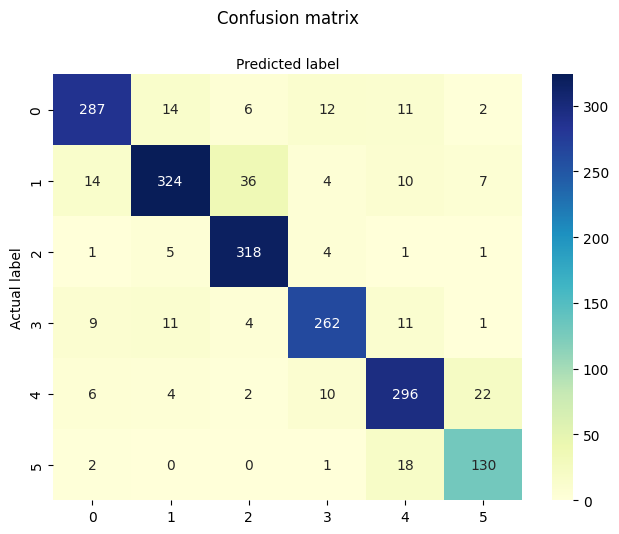

In [295]:
confusion_matrix(cnf_matrix)

In [296]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.86      0.88       332
     Sadness       0.91      0.82      0.86       395
       Anger       0.87      0.96      0.91       330
        Fear       0.89      0.88      0.89       298
        Love       0.85      0.87      0.86       340
   Surprised       0.80      0.86      0.83       151

    accuracy                           0.88      1846
   macro avg       0.87      0.88      0.87      1846
weighted avg       0.88      0.88      0.88      1846



##### CounterVectorizer -- Unigram and Bigram(n2)



In [297]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [298]:
y_pred = RF_model(X_train, y_train, X_test)

In [299]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[291  12   5   8  15   1]
 [ 10 333  36   3   8   5]
 [  1   6 322   1   0   0]
 [  8   9   1 274   6   0]
 [  6   6   3   8 298  19]
 [  2   1   0   1  23 124]]


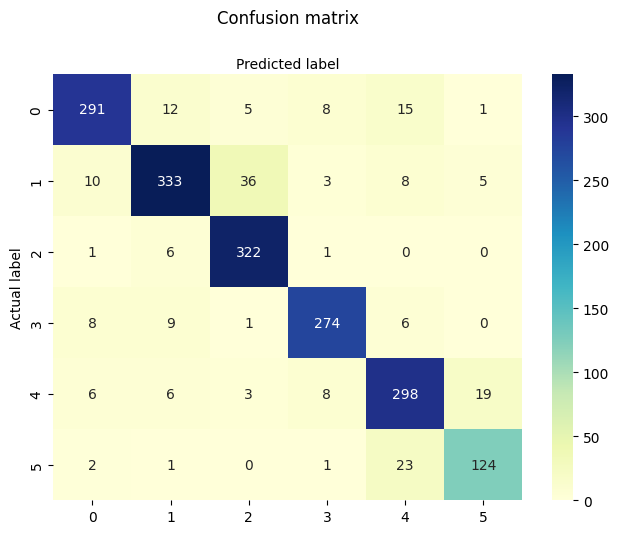

In [300]:
confusion_matrix(cnf_matrix)

In [301]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.88      0.90       332
     Sadness       0.91      0.84      0.87       395
       Anger       0.88      0.98      0.92       330
        Fear       0.93      0.92      0.92       298
        Love       0.85      0.88      0.86       340
   Surprised       0.83      0.82      0.83       151

    accuracy                           0.89      1846
   macro avg       0.89      0.89      0.88      1846
weighted avg       0.89      0.89      0.89      1846



##### CounterVectorizer -- Bigram(n3)

In [302]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [303]:
y_pred = RF_model(X_train, y_train, X_test)

In [304]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[166  60   7  77  19   3]
 [ 22 252  16  86  16   3]
 [  7  87 149  74  11   2]
 [ 15  36   5 219  21   2]
 [ 10  43   2  43 222  20]
 [  6  19   2  27  15  82]]


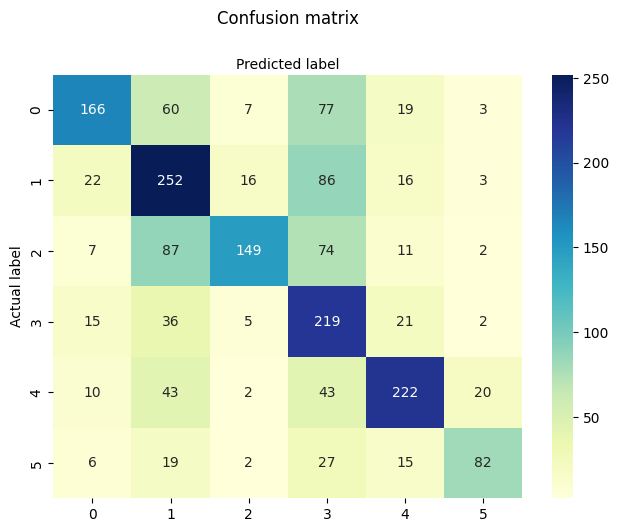

In [305]:
confusion_matrix(cnf_matrix)

In [306]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.73      0.50      0.59       332
     Sadness       0.51      0.64      0.57       395
       Anger       0.82      0.45      0.58       330
        Fear       0.42      0.73      0.53       298
        Love       0.73      0.65      0.69       340
   Surprised       0.73      0.54      0.62       151

    accuracy                           0.59      1846
   macro avg       0.66      0.59      0.60      1846
weighted avg       0.65      0.59      0.60      1846



##### TfidfVectorizer -- Unigram(n1)

In [307]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [308]:
y_pred = RF_model(X_train, y_train, X_test)

In [309]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[280  21   5  14  10   2]
 [ 12 329  34   4  11   5]
 [  0  10 314   4   1   1]
 [ 10  11   3 259  14   1]
 [  7   2   4   5 302  20]
 [  0   3   0   2  33 113]]


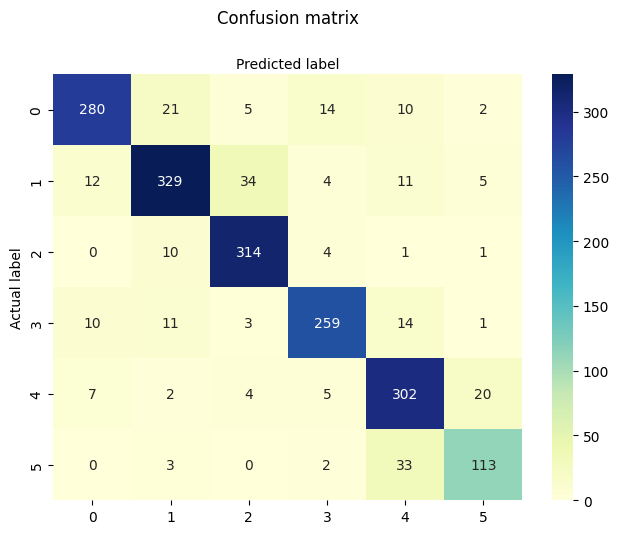

In [310]:
confusion_matrix(cnf_matrix)

In [311]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.84      0.87       332
     Sadness       0.88      0.83      0.85       395
       Anger       0.87      0.95      0.91       330
        Fear       0.90      0.87      0.88       298
        Love       0.81      0.89      0.85       340
   Surprised       0.80      0.75      0.77       151

    accuracy                           0.87      1846
   macro avg       0.86      0.86      0.86      1846
weighted avg       0.87      0.87      0.86      1846



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [312]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [313]:
y_pred = RF_model(X_train, y_train, X_test)

In [314]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[263  37   5  14  12   1]
 [  7 338  32   3  10   5]
 [  1  15 312   1   1   0]
 [  6  16   2 261  13   0]
 [  5  10   3   4 300  18]
 [  1   4   0   2  19 125]]


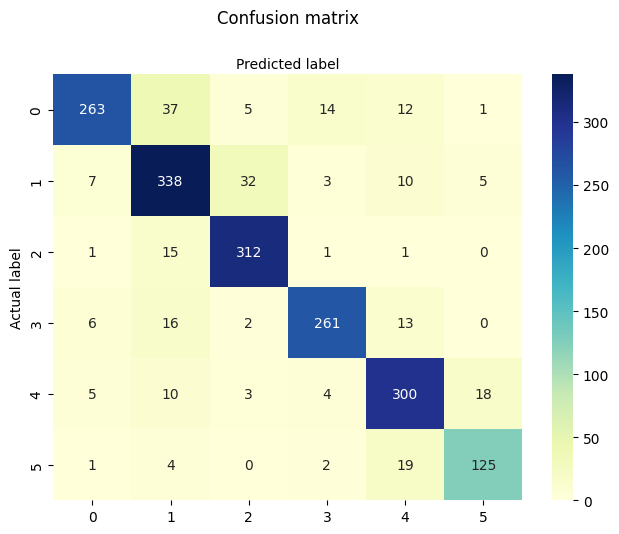

In [315]:
confusion_matrix(cnf_matrix)

In [316]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.79      0.86       332
     Sadness       0.80      0.86      0.83       395
       Anger       0.88      0.95      0.91       330
        Fear       0.92      0.88      0.90       298
        Love       0.85      0.88      0.86       340
   Surprised       0.84      0.83      0.83       151

    accuracy                           0.87      1846
   macro avg       0.87      0.86      0.86      1846
weighted avg       0.87      0.87      0.87      1846



##### TfidfVectorizer -- Bigram(n3)

In [317]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [318]:
y_pred = RF_model(X_train, y_train, X_test)

In [319]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[161  66   8  32  65   0]
 [  8 252  16  22  94   3]
 [  9  84 154  24  59   0]
 [  8  44   5 180  61   0]
 [  7  47   4  22 250  10]
 [  4  24   2   8  44  69]]


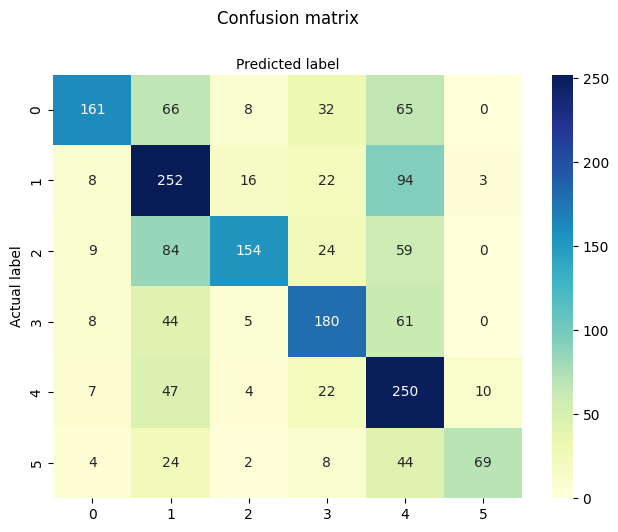

In [320]:
confusion_matrix(cnf_matrix)

In [321]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.82      0.48      0.61       332
     Sadness       0.49      0.64      0.55       395
       Anger       0.81      0.47      0.59       330
        Fear       0.62      0.60      0.61       298
        Love       0.44      0.74      0.55       340
   Surprised       0.84      0.46      0.59       151

    accuracy                           0.58      1846
   macro avg       0.67      0.56      0.58      1846
weighted avg       0.65      0.58      0.58      1846

